# prior to this need to
remove punctuation <br>
remove capitalization<br>
convert salary to numerical

import string.punctuation

In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [4]:
from textblob import TextBlob, Word
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string

C:\ProgramData\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\ProgramData\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable


In [5]:
#importing raw data
jobs_original = pd.read_csv('./data/alljobs_clean.csv')
print(jobs_original.shape)
jobs_original.head()

(20028, 12)


,company,company_rating,industry,job_description_all_text,job_title,location,salary_data_text,jd_no_stopwords,salary_values,salary_period,salary_multiplier,annual_salary
0,ANZ Banking Group,4.1,data,"Consultant Data Scientist – Data Activation, M...",Data Scientist Consultant,Melbourne,NaN,"['consultant', 'data', 'scientist', '–', 'data...",NaN,NaN,NaN,NaN
1,NAB - National Australia Bank,3.8,data,Work type: Permanent Full time\nLocation: Aust...,Data Scientist,Melbourne,NaN,"['work', 'type', 'permanent', 'full', 'time', ...",NaN,NaN,NaN,NaN
2,ANZ Banking Group,4.1,data,The Team\n\nThe Customer Service Operations Au...,Senior Data Scientist,Melbourne,NaN,"['team', 'customer', 'service', 'operations', ...",NaN,NaN,NaN,NaN
3,NAB - National Australia Bank,3.8,data,Work type: Permanent Full time\nLocation: Aust...,Data Analytics Engineer,Melbourne,NaN,"['work', 'type', 'permanent', 'full', 'time', ...",NaN,NaN,NaN,NaN
4,Coles,3.8,data,About Us\n\nThe Digital team is focused on rei...,Data Scientist,Melbourne,NaN,"['us', 'digital', 'team', 'focused', 'reinvent...",NaN,NaN,NaN,NaN


In [4]:
jd_text_df = jobs_original[['job_title','job_description_all_text','industry']]
jd_text_df.isna().sum()

job_title                   0
job_description_all_text    0
industry                    0
dtype: int64

In [19]:
jd_text_df['gender_dominance'] = ['male' if ((industry == 'data') | (industry == 'manufacturing') | (industry == 'construction')) 
        else 'female' if ((industry == 'nursing') | (industry == 'early_learning'))
       else 'mixed' for industry in jd_text_df.industry]

jd_text_df.gender_dominance.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mixed     8218
male      8002
female    3809
Name: gender_dominance, dtype: int64

### currently mixed and male classes are evenly represented, but female is much fewer; may need to collect additional data or use techniques to improve balance

### Converted cells below to markdown temporarily to avoid rerunning LDA

tf_vect = CountVectorizer(strip_accents='unicode', 
                          stop_words='english',
                          lowercase='true',
                          token_pattern=r'\b[a-zA-Z]{3,}\b',
                          max_df=0.5,
                          min_df=10)

dtm_tf = tf_vect.fit_transform(jd_text_df.job_description_all_text)
print(dtm_tf.shape)


lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

#visualizing results
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vect)

lda_tf2 = LatentDirichletAllocation(n_components=8, random_state=0)
lda_tf2.fit(dtm_tf)

#visualizing results
pyLDAvis.sklearn.prepare(lda_tf2, dtm_tf, tf_vect)

## Visualizations to do
1. LDA (above)
2. Relationship with rating
3. Relationship with sentiment x2
4. Word cloud
 

### Is there any relationship between company rating and dominant gender?

In [27]:
jd_text_df['company_rating'] = jobs_original.company_rating

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


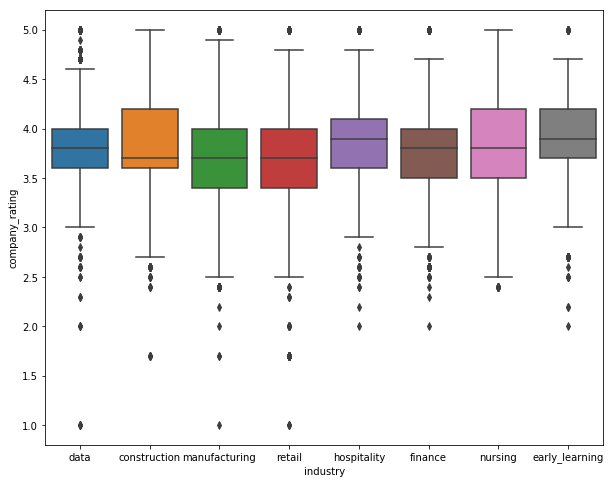

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x='industry', y='company_rating', data=jd_text_df)

In [32]:
jd_text_df.columns

Index(['job_title', 'job_description_all_text', 'industry', 'gender_dominance',
       'company_rating'],
      dtype='object')

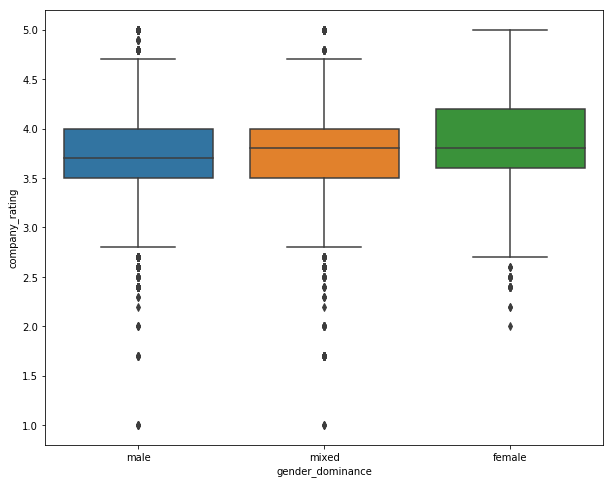

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(x='gender_dominance', y='company_rating', data=jd_text_df)

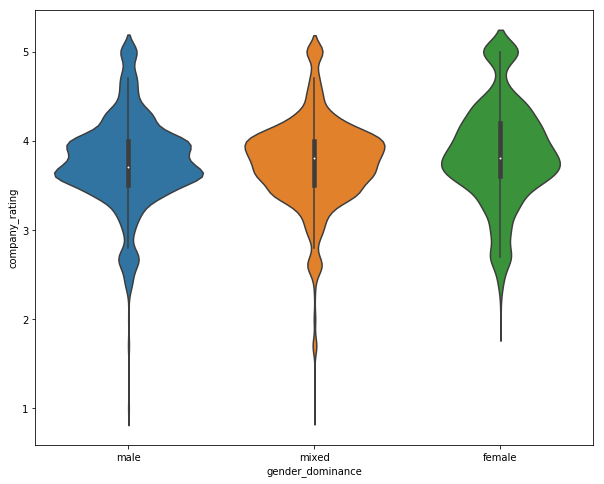

In [47]:
plt.figure(figsize=(10,8))
sns.violinplot(x='gender_dominance', y='company_rating', data=jd_text_df)

In [48]:
print('Mean',  '\n', jd_text_df.groupby('gender_dominance').mean())
print('Median',  '\n', jd_text_df.groupby('gender_dominance').median())


Mean 
                   company_rating
gender_dominance                
female                  3.853239
male                    3.761165
mixed                   3.759106
Median 
                   company_rating
gender_dominance                
female                       3.8
male                         3.7
mixed                        3.8


In [54]:
#generating sentiment for jd text
#generating two values using vaderSentiment and TextBlob

vader = SentimentIntensityAnalyzer()
jd_text_df['vader_sentiment'] = [vader.polarity_scores(jd) for jd in jd_text_df.job_description_all_text]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [61]:
vader_sentiment_neg = jd_text_df.vader_sentiment.map(lambda x: x['neg'])
vader_sentiment_pos = jd_text_df.vader_sentiment.map(lambda x: x['pos'])
vader_sentiment_neu = jd_text_df.vader_sentiment.map(lambda x: x['neu'])
vader_sentiment_compound = jd_text_df.vader_sentiment.map(lambda x: x['compound'])

In [65]:
jd_text_df['vader_sentiment_neg'] = vader_sentiment_neg
jd_text_df['vader_sentiment_pos'] = vader_sentiment_pos
jd_text_df['vader_sentiment_neu'] = vader_sentiment_neu
jd_text_df['vader_sentiment_compound'] = vader_sentiment_compound

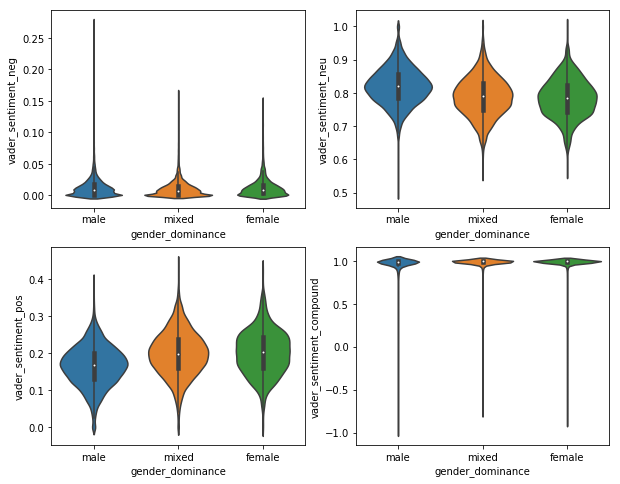

In [78]:
###need to put these and below next to each other
#visualize by industry
fig, axes = plt.subplots(2,2,figsize=(10,8))

for i, sentiment in enumerate(['neg','neu','pos','compound']):
    y_string = 'vader_sentiment_' + sentiment
    
    axi = plt.subplot(2,2,(i+1))
    sns.violinplot(x='gender_dominance', y=y_string, data=jd_text_df, ax=axi)

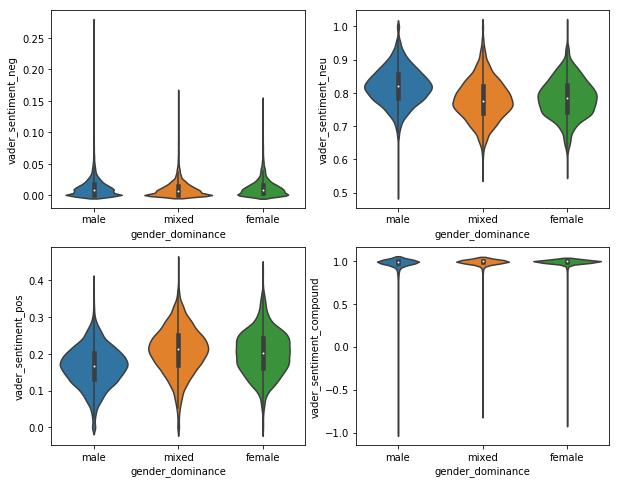

In [111]:
#any different without finance?
fig, axes = plt.subplots(2,2,figsize=(10,8))

no_finance = jd_text_df[jd_text_df.industry != 'finance']

for i, sentiment in enumerate(['neg','neu','pos','compound']):
    y_string = 'vader_sentiment_' + sentiment
    
    axi = plt.subplot(2,2,(i+1))
    sns.violinplot(x='gender_dominance', y=y_string, data=no_finance, ax=axi)

In [79]:
def detect_sentiment(text):
    return(TextBlob(text).sentiment.polarity)

In [81]:
jd_text_df['textblob_sentiment'] = jd_text_df.job_description_all_text.map(detect_sentiment)

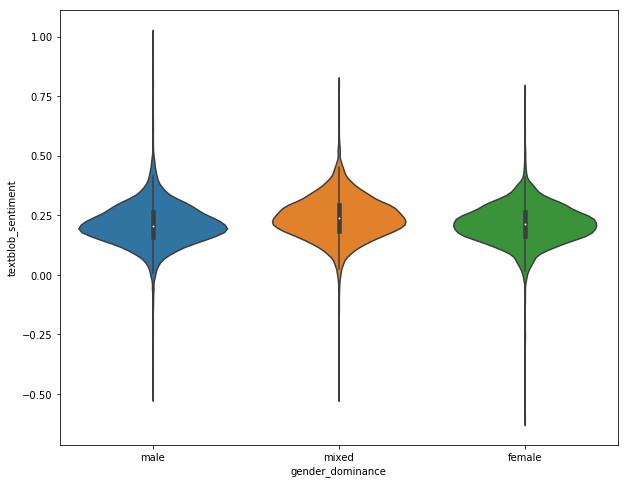

In [82]:
#visualize by industry
plt.figure(figsize=(10,8)
sns.violinplot(x='gender_dominance', y='textblob_sentiment', data=jd_text_df)

In [108]:
#time for a word cloud for each industry
cvect = CountVectorizer()

industry_vocab_size = {}
for industry in set(jd_text_df.industry.values):
    corpus = jd_text_df.job_description_all_text[jd_text_df.industry == industry]
    vocab_size = cvect.fit_transform(corpus).shape[1]
    industry_vocab_size[industry] = vocab_size


In [109]:
industry_vocab_size

{'finance': 22590,
 'data': 27508,
 'early_learning': 15616,
 'nursing': 18853,
 'hospitality': 19527,
 'manufacturing': 23081,
 'retail': 21587,
 'construction': 13886}

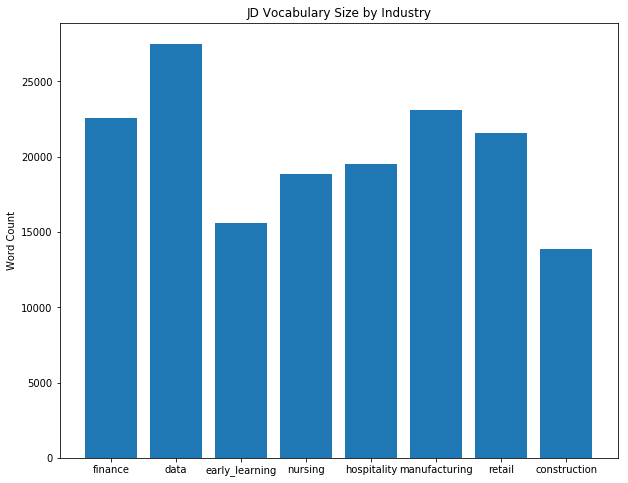

In [137]:
#add hue of gender??
lists = industry_vocab_size.items()
x, y = zip(*lists)

plt.figure(figsize=(10,8))
plt.bar(x, y)
plt.title('JD Vocabulary Size by Industry')
plt.ylabel('Word Count')
plt.show()

In [139]:
jd_text_df.industry.unique()

array(['data', 'construction', 'manufacturing', 'retail', 'hospitality',
       'finance', 'nursing', 'early_learning'], dtype=object)

In [169]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


ValueError: Length of values does not match length of index

In [92]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

dataset = jd_text_df.job_description_all_text[0]
def create_word_cloud(string):
   maskArray = np.array(Image.open("./data/hard-hat.png"))
   cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("hard-hat.png")
dataset = dataset.lower()
create_word_cloud(dataset)

### Checking level of use of gender coded words

For this portion of the analysis, we are using the word list from gender decoder (link). You can learn more about the research behind this word list here (link).


In [ ]:
masculine_words = ()
feminine_words = ()

jd_masculine_words = [word for word in jd if word in masculine_words]
jd_feminine_words = [word for word in jd if word in feminine_words]

# total count masculine
# repeated masculine
# total count feminine
# repeated feminine

In [ ]:
#in this instance masculine encoding will be positive, feminine negative
gender_balance = (masculine - feminine)
adjusted_gender_balance = (masculine - feminine)/(masculine + feminine)

#add gender_balance to df
#plot gender balance by industry

### Looking at relationships with salary